# Assignment 05

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: April 03, 2023

#### Import Libraries:

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
from random import randint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical # Convert Class Vectors to Binary Class Matrices
from sklearn.metrics import accuracy_score, confusion_matrix
from PIL import Image

#### Functions To Plot Images:

In [4]:
# function to plot images
def imgSubPlot(imgFileNameList):
    images_array = []
    for filename in imgFileNameList:
        image = Image.open(filename)
        image_array = np.array(image)
        images_array.append(image_array)
    plt.figure(figsize=(45, 40))
    plt.tight_layout()
    #plt.suptitle('Problem #1', fontsize=32)
    plt.tight_layout()
    for i in range(1, 7):
        plt.subplot(2, 3, i)
        plt.imshow(images_array[i - 1], cmap = 'gray')
        plt.title('Page: ' + str(i), fontsize=32)
    plt.show()

def dispAnImage(filepath):
    myImage = img.imread(filepath)
    plt.figure(figsize = (15, 15))
    plt.imshow(myImage)
    plt.show()

def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

# Plot Features of MNIST data
def feat_plot(features, labels, classes, title):
    for class_i in classes:
        plt.plot(features[labels[:] == classes[class_i], 0],
                 features[labels[:] == classes[class_i], 1], 'o', markersize = 5)
        # plt.axis([-2, 2, -2, 2])
        plt.xlabel('X: Feature 1')
        plt.ylabel('Y: Feature 2')
        plt.title(title)
        plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [12, 6])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()


#### Function For Feature Extraction From MNIST Images:

In [5]:
def feat_extract_mult(images):
    width = images.shape[1]
    height = images.shape[2]
    features = np.zeros((images.shape[0], 4))

    features_temp = np.sum(images[:, 0:int(width / 2), 0:int(height / 2)], axis = 2) # Quadrant 0
    features[:,0] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, 0:int(width / 2), int(height / 2):], axis = 2) # Quadrant 1
    features[:,1] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(width / 2):, 0:int(height / 2)], axis = 2) # Quadrant 2
    features[:,2] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(images.shape[1] / 2):, int(images.shape[2] / 2):], axis = 2) # Quadrant 3
    features[:,3] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    return features

## Problem 1: Forward-backward propagation: Consider the following forward feed neural network:

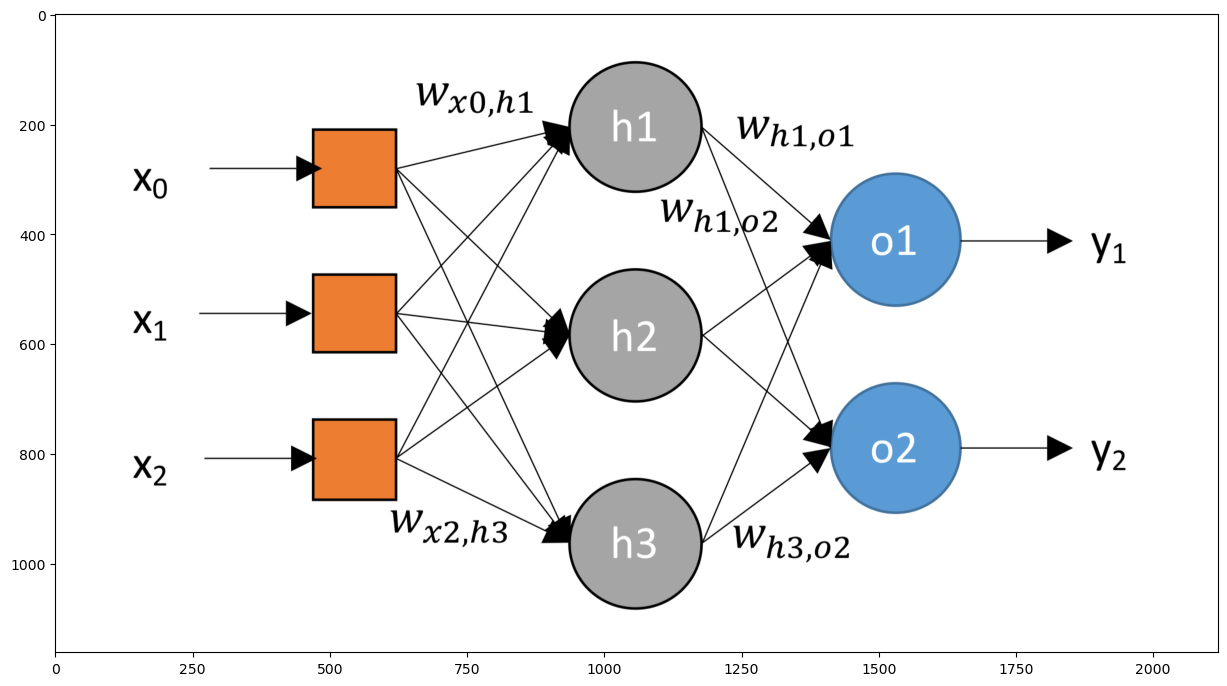

In [5]:
dispAnImage('../assets/HW5/HW5-1.png')

#### Initial weights are given below:
#### Learn rate $ \eta = 0.5 $. The activation function is a sigmoid function with $ \alpha = 1 $ for all the neurons.

#### $$ \varphi(x) = \frac{1}{1 + \alpha e^{-x}} $$

#### $$ w_{x_0, h_1} = 0.18, \ w_{x_1, h_1} = 0.32, \ w_{x_2, h_1} = 0.42 $$
#### $$ w_{x_0, h_2} = 0.51, \ w_{x_1, h_2} = 0.64, \ w_{x_2, h_2} = 0.12 $$
#### $$ w_{x_0, h_3} = 0.43, \ w_{x_1, h_3} = 0.72, \ w_{x_2, h_3} = 0.33 $$
#### $$ w_{h_0, O_1} = 0.53, \ w_{h_1, O_1} = 0.22, \ w_{h_2, O_1} = 0.19, \ w_{h_2, O_1} = 0.61 $$
#### $$ w_{h_0, O_2} = 0.61, \ w_{h_1, O_2} = 0.38, \ w_{h_2, O_2} = 0.21, \ w_{h_3, O_2} = 0.15 $$

#### For training, the inputs of the features $ (x_1 = 1, \ x_2 = 0) $  and the label of class $ y_1 $ , perform the forward-backward steps as instructed below.

#### HINT: The data sample belongs to class $ y_1 $. This means that for this data sample, $ y_1 = 1 $ and $ y_2 = 0 $.

 - a) Perform the forward propagation from the left to the right side of the network. Show the detailed calculations in each step. Report the computed outputs in the table below:

<div align="center">

| $ y_{h_1} $ | $ y_{h_2} $ | $ y_{h_3} $ | $ y_{1} $ | $ y_{2} $ |
| :-: | :-: | :-: | :-: | :-: |
| xXx | xXx | xXx | xXx | xXx |

</div>

In [ ]:
### Display Image for part A:

- b) Compute the local gradients of each node from the right to the left side of the network. Show the detailed calculations in each step. Report the computed local gradients in the table below:

<div align="center">

| $ \delta_{h_1} $ | $ \delta_{h_2} $ | $ \delta_{h_3} $ | $ \delta_{O_1} $ | $ \delta_{O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| xXx | xXx | xXx | xXx | xXx |

</div>

In [ ]:
### Display Image for part b:

 - c) Only for the bias weights of each neuron: compute the change in the weight and the updated weight. Show the detailed calculations in each step. Report the computed values in the table below:

 <div align="center">

| $ \Delta w_{x_0, h_1} $ | $ \Delta w_{x_0, h_2} $ | $ \Delta w_{x_0, h_3} $ | $ \Delta w_{h_0, O_1} $ | $ \Delta w_{h_0, O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| xXx | xXx | xXx | xXx | xXx |

</div>
<br><br>
<div align="center">

|  $ w_{x_0, h_1} $ | $ w_{x_0, h_2} $ | $ w_{x_0, h_3} $ | $ w_{h_0, O_1} $ | $ w_{h_0, O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| xXx | xXx | xXx | xXx | xXx |

</div>

In [ ]:
### Display An Image for part C

## Problem 2) Application of Keras to build, compile, and train a neural network as a three-class classifier for MNIST dataset (0 vs. 1 vs. 2):

 - a) Use mnist function in `keras.datasets` to load MNIST dataset and split it into training and testing sets. Then, randomly select 20% of the training images along with their corresponding labels to be the validation data.
 - b) Feature extraction: average the pixel values in the quadrants in each image to generate a feature vector of 4 values for each image.
 - c) Convert the label vectors for all the sets to binary class matrices using `to_categorical()` Keras function.
 - d) Build, compile, train, and then evaluate:
    - i. Build a neural network with 1 layer that contains 16 nodes using the Keras library.
    - ii. Compile the network. Make sure to select a correct loss function for this classification problem. Use stochastic gradient descent learning (SGD, learning rate of 0.0001). Explain your selection of the loss function.
    - iii. Train the network for 30 epochs and a batch size of 16.
    - iv. Plot the training loss (i.e., the learning curve) for all the epochs.
    - v. Use the evaluate() Keras function to find the training and validation loss and accuracy.
 - e) Repeat step (d) for each of the following networks:
 <div align="center">

| Model # | Details |
| :-: | :-: |
| $ 1 $ | 1 Layer<br>16 Nodes |
| $ 2 $ | 1 Layer<br>64 Nodes |
| $ 3 $ | 1 Layer<br>128 Nodes |
| $ 4 $ | 2 Layers<br>128 Nodes<br>16 nodes |
| $ 5 $ | 2 Layers<br>128 Nodes<br>64 nodes |

</div>

 - f) What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.
 - g) Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

#### Load MNIST Dataset & Split Into Training & Testing Sets:

In [6]:
# Load Data and Split to Training and Testing Sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


#### Plot Digits 0 - 9 From The Training Set:

 - For Each Digit, Select A Random Sample.

10 Random Images from 0 - 9: 



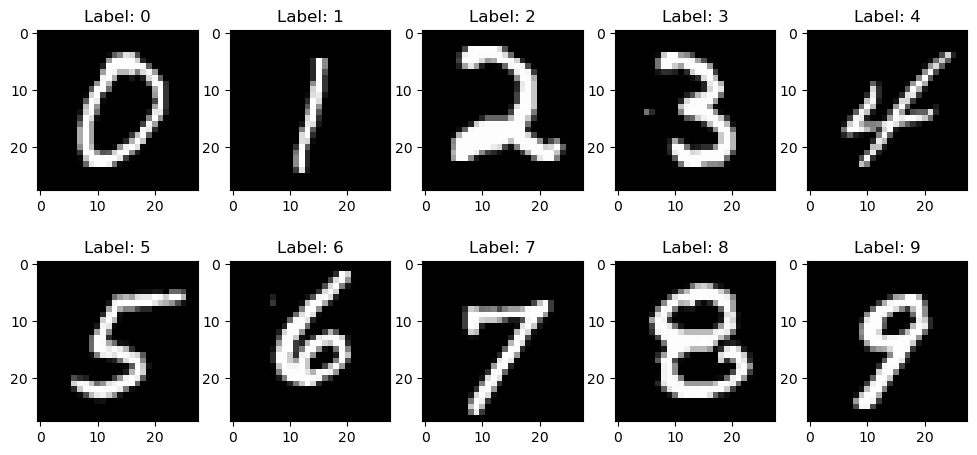

In [7]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

print(f'10 Random Images from 0 - 9: \n')
img_plt(x_train_rnd, y_train_rnd) # plot the images

### Select MNIST Digits 0, 1 and 2:
 
 - Select All 0's, 1's & 2's From Training & Testing Sets.
 - Create an array of the images.
 - Create a 2nd array of labels for the images.

In [8]:
# Create a boolean mask to select images of digits 0, 1, and 2
train_mask_012 = np.isin(y_train, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_train_012 = x_train[train_mask_012]
y_train_012 = y_train[train_mask_012]

#print(x_train_012.shape) # debug
#print(y_train_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_train_012\' is: {x_train_012.shape[0]}\n')

test_mask_012 = np.isin(y_test, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_test_012 = x_test[test_mask_012]
y_test_012 = y_test[test_mask_012]

#print(x_test_012.shape) # debug
#print(y_test_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_test_012\' is: {x_test_012.shape[0]}\n')

Total Number of 0's, 1's & 2's in 'x_train_012' is: 18623

Total Number of 0's, 1's & 2's in 'x_test_012' is: 3147



#### Select 20% Of The Training Images For Validation & Randomize Everything:

In [9]:
num_train_img = x_train_012.shape[0]

# New Array For Randomizing the Training and Validation Sets
train_ind = np.arange(0, num_train_img)
print(f'Ordered Training Indices: {train_ind}')
train_ind_rnd = np.random.permutation(train_ind)
print(f'Randomized Training Indices: {train_ind_rnd}\n')

# Extract 20% of training data as Validation Data & randomize
x_valid_012_rnd = x_train_012[train_ind_rnd[0:int(0.2 * num_train_img)],:,:]
y_valid_012_rnd = y_train_012[train_ind_rnd[0:int(0.2 * num_train_img)]]

# Randomize the remaining 80% of the data for Training
x_train_012_rnd = x_train_012[train_ind_rnd[int(0.2 * num_train_img):],:,:]
y_train_012_rnd = y_train_012[train_ind_rnd[int(0.2 * num_train_img):]]
print(f'Number of Training Images Before Validation = {x_train_012.shape[0]}')
print(f'Number of Training Images After Validation = {x_train_012_rnd.shape[0]}')
print(f'Number of Validation Images = {x_valid_012_rnd.shape[0]}\n')

num_test_img = x_test_012.shape[0]
print(f'Number of Testing Images Before Randomization = {num_test_img}')

# New Array For Randomizing the Testing Set
test_ind = np.arange(0, num_test_img)
print(f'Ordered Test Indices: {test_ind}')
test_ind_rnd = np.random.permutation(test_ind)
print(f'Randomized Test Indices: {test_ind_rnd}\n')

x_test_012_rnd = x_test_012[test_ind_rnd[:],:,:]
y_test_012_rnd = y_test_012[test_ind_rnd[:]]

# Test that the original training set = new training set + validation set:
if(x_valid_012_rnd.shape[0] + x_train_012_rnd.shape[0] == num_train_img):
    print('Success!!\n')
else:
    print('FAIL!!\n')

# Check that Test set and randomized test set have the same size:
if(x_test_012_rnd.shape[0] == x_test_012.shape[0]):
    print('Success!!\n')
else:
    print('FAIL!!\n')

Ordered Training Indices: [    0     1     2 ... 18620 18621 18622]
Randomized Training Indices: [10514  5644  6256 ...  4991   154  5352]

Number of Training Images Before Validation = 18623
Number of Training Images After Validation = 14899
Number of Validation Images = 3724

Number of Testing Images Before Randomization = 3147
Ordered Test Indices: [   0    1    2 ... 3144 3145 3146]
Randomized Test Indices: [1428 1100 2300 ...  908   83 2864]

Success!!

Success!!



#### Plot Random Images From Randomized Testing, Training & Validation Sets:

1st 10 Randomized Images From Training Set:



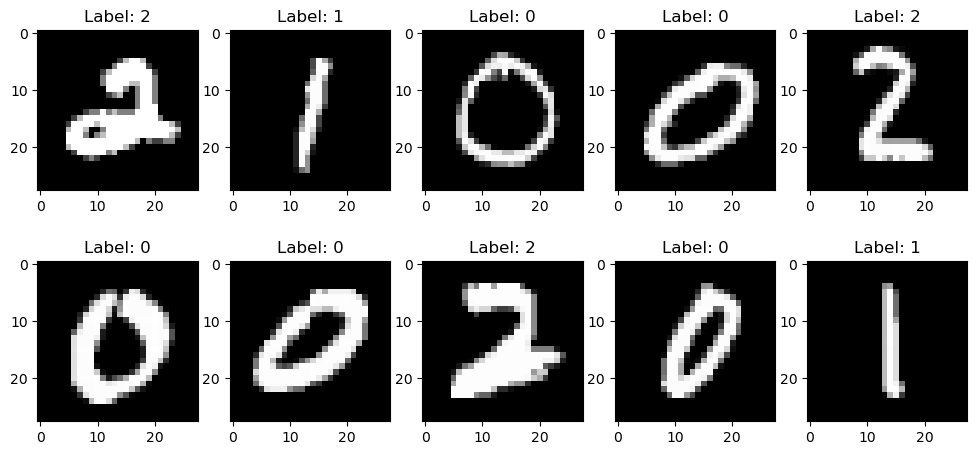


1st 10 Randomized Images From Testing Set:



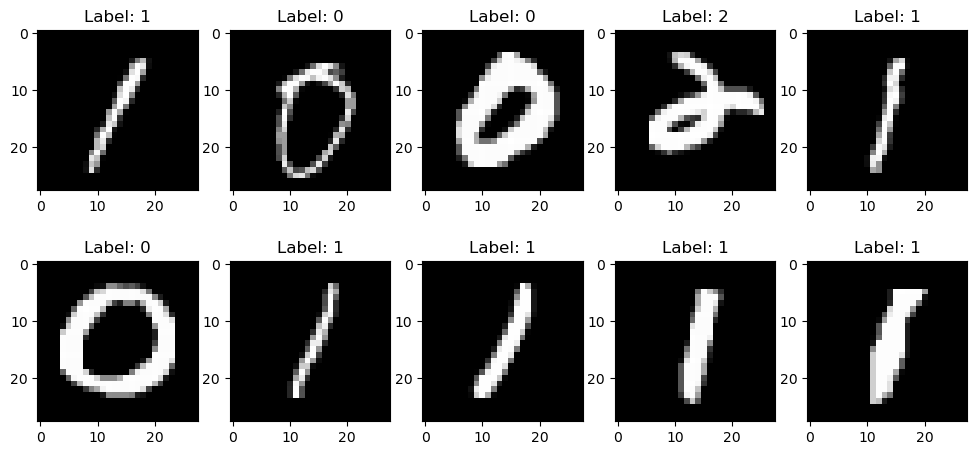


1st 10 Randomized Images From Validation Set:



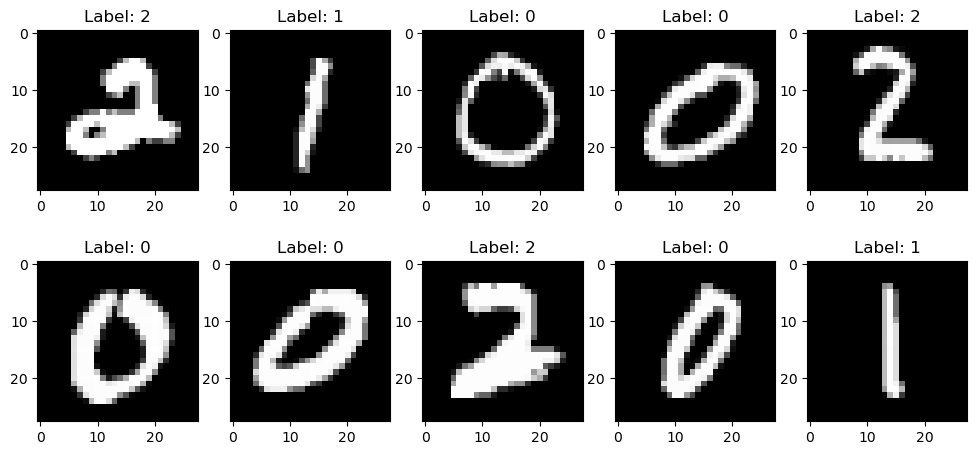

In [10]:
print('1st 10 Randomized Images From Training Set:\n')
img_plt(x_train_012_rnd[0:10], y_train_012_rnd[0:10])

print('\n1st 10 Randomized Images From Testing Set:\n')
img_plt(x_test_012_rnd[0:10], y_test_012_rnd[0:10])

print('\n1st 10 Randomized Images From Validation Set:\n')
img_plt(x_train_012_rnd[0:10], y_train_012_rnd[0:10])

#### Feature Extraction & Average Pixel Values For Each of 4 Quadrants:

 - Plot Extracted Features As A Debug

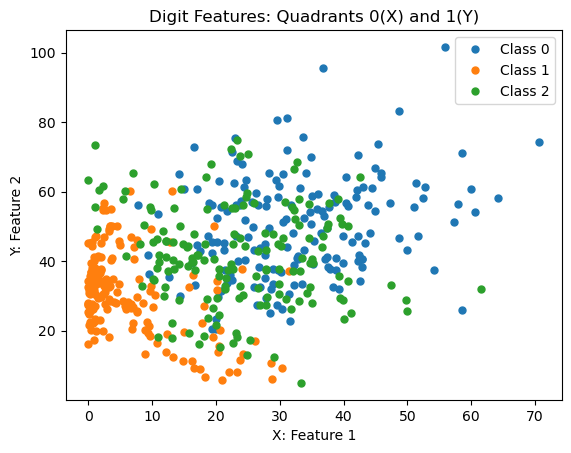

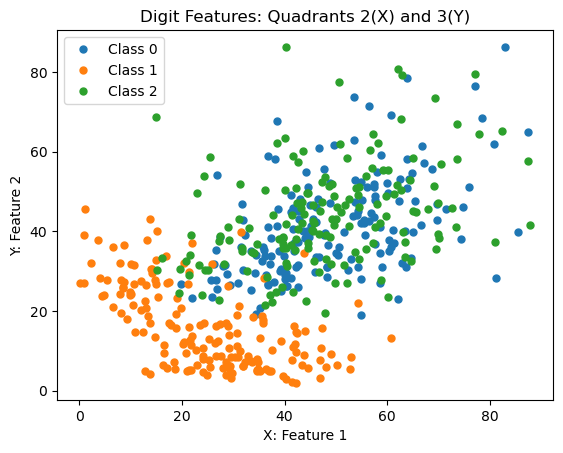

In [11]:
classes = [0, 1, 2]
feature_train_012 = feat_extract_mult(x_train_012_rnd)
feature_valid_012 = feat_extract_mult(x_valid_012_rnd)
feature_test_012 = feat_extract_mult(x_test_012_rnd)

feat_plot(feature_train_012[0:500, 0:2], y_train_012_rnd[0:500], classes, 'Digit Features: Quadrants 0(X) and 1(Y)')
feat_plot(feature_train_012[0:500, 2:4], y_train_012_rnd[0:500], classes, 'Digit Features: Quadrants 2(X) and 3(Y)')

#### Convert Label Vectors To Binary Class Matrices:

In [12]:
y_train_012_cat = to_categorical(y_train_012_rnd, len(classes))
y_valid_012_cat = to_categorical(y_valid_012_rnd, len(classes))
y_test_012_cat = to_categorical(y_test_012_rnd, len(classes))

#### 1st Try: 1 Layer, 16 Nodes

##### Build The Model:

In [14]:
model1 = Sequential()
model1.add(Dense(input_dim = 4, units = 16, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model1.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [16]:
opt1 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

history = model1.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 1s 879us/step - loss: 1.2685 - accuracy: 0.3357
Epoch 2/30
932/932 [==============================] - 1s 764us/step - loss: 1.0894 - accuracy: 0.4777
Epoch 3/30
932/932 [==============================] - 1s 739us/step - loss: 0.9762 - accuracy: 0.5276
Epoch 4/30
932/932 [==============================] - 1s 835us/step - loss: 0.9322 - accuracy: 0.5576
Epoch 5/30
932/932 [==============================] - 1s 783us/step - loss: 0.9056 - accuracy: 0.6121
Epoch 6/30
932/932 [==============================] - 1s 749us/step - loss: 0.8842 - accuracy: 0.6296
Epoch 7/30
932/932 [==============================] - 1s 804us/step - loss: 0.8663 - accuracy: 0.6402
Epoch 8/30
932/932 [==============================] - 1s 762us/step - loss: 0.8508 - accuracy: 0.6538
Epoch 9/30
932/932 [==============================] - 1s 887us/step - loss: 0.8364 - accuracy: 0.6661
Epoch 10/30
932/932 [==============================] - 1s 802us/step - loss: 0.823

##### Evaluate The Model:

466/466 [==============================] - 0s 705us/step - loss: 0.6281 - accuracy: 0.7976

Total Loss From Training Set:  0.6280811429023743
Accuracy of Training Set:  0.797637403011322 

117/117 [==============================] - 0s 721us/step - loss: 0.6066 - accuracy: 0.8131

Total Loss From Validation Set:  0.6065642833709717
Accuracy of Validation Set:  0.8131042122840881 



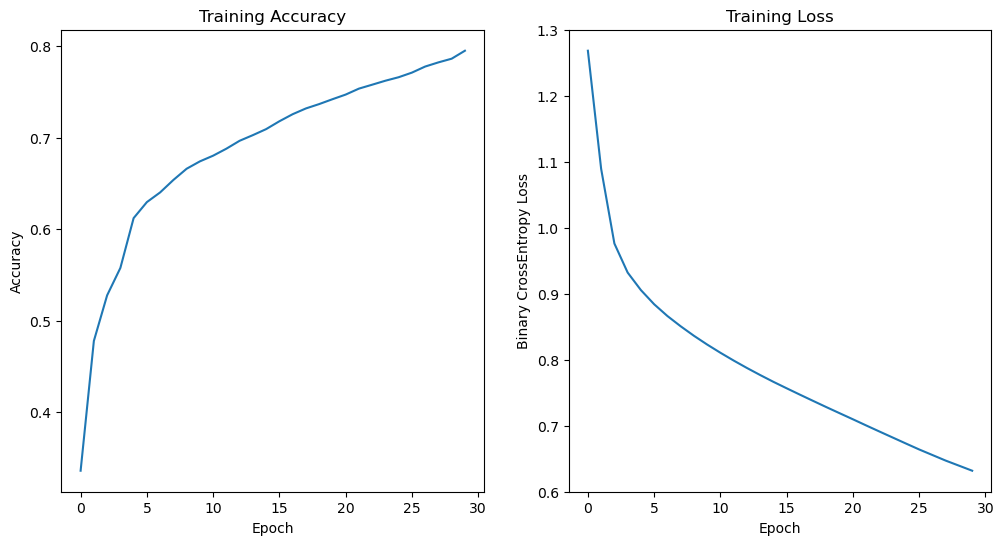

In [17]:
scoreTrain1 = model1.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain1[0])
print('Accuracy of Training Set: ', scoreTrain1[1], '\n')

scoreValid1 = model1.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid1[0])
print('Accuracy of Validation Set: ', scoreValid1[1], '\n')

accuracyCurve1 = np.array(history.history['accuracy'])
lossCurve1 = np.array(history.history['loss'])
plotCurve(accuracyCurve1, lossCurve1)

####  2nd Try: 1 Layer, 64 Nodes

##### Build The Model:

In [18]:
model2 = Sequential()
model2.add(Dense(input_dim = 4, units = 64, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model2.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [19]:
opt2 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])

history2 = model2.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 1s 1ms/step - loss: 0.9848 - accuracy: 0.5373
Epoch 2/30
932/932 [==============================] - 1s 845us/step - loss: 0.7323 - accuracy: 0.7518
Epoch 3/30
932/932 [==============================] - 1s 782us/step - loss: 0.6593 - accuracy: 0.7919
Epoch 4/30
932/932 [==============================] - 1s 792us/step - loss: 0.6012 - accuracy: 0.8151
Epoch 5/30
932/932 [==============================] - 1s 851us/step - loss: 0.5651 - accuracy: 0.8310
Epoch 6/30
932/932 [==============================] - 1s 919us/step - loss: 0.5405 - accuracy: 0.8421
Epoch 7/30
932/932 [==============================] - 1s 827us/step - loss: 0.5193 - accuracy: 0.8486
Epoch 8/30
932/932 [==============================] - 1s 785us/step - loss: 0.5020 - accuracy: 0.8552
Epoch 9/30
932/932 [==============================] - 1s 789us/step - loss: 0.4877 - accuracy: 0.8570
Epoch 10/30
932/932 [==============================] - 1s 816us/step - loss: 0.4753 

##### Evaluate The Model:

466/466 [==============================] - 0s 710us/step - loss: 0.3725 - accuracy: 0.8759

Total Loss From Training Set:  0.37249165773391724
Accuracy of Training Set:  0.8758977055549622 

117/117 [==============================] - 0s 731us/step - loss: 0.3514 - accuracy: 0.8840

Total Loss From Validation Set:  0.35137009620666504
Accuracy of Validation Set:  0.8839957118034363 



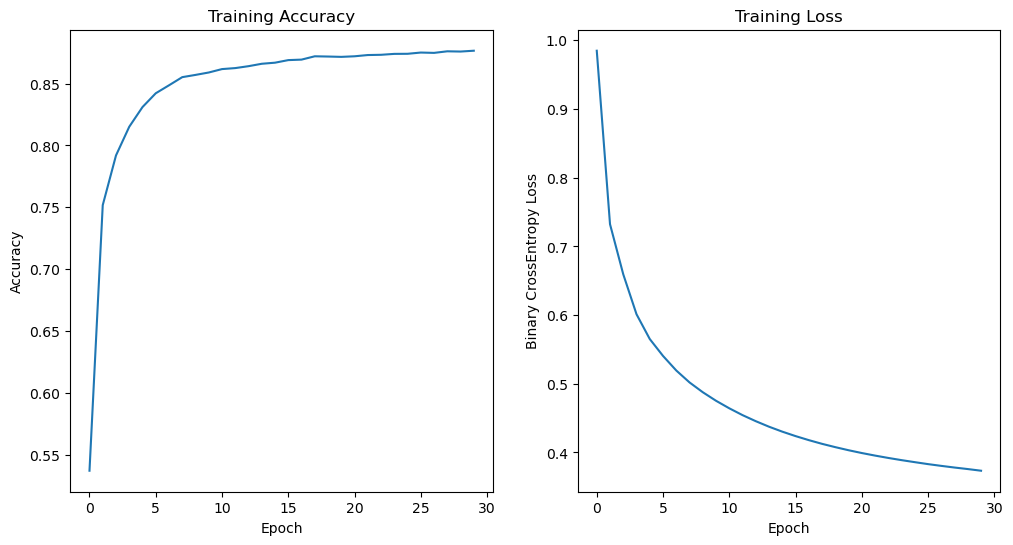

In [20]:
scoreTrain2 = model2.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain2[0])
print('Accuracy of Training Set: ', scoreTrain2[1], '\n')

scoreValid2 = model2.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid2[0])
print('Accuracy of Validation Set: ', scoreValid2[1], '\n')

accuracyCurve2 = np.array(history2.history['accuracy'])
lossCurve2 = np.array(history2.history['loss'])
plotCurve(accuracyCurve2, lossCurve2)

#### 3rd Try: 1 Layer, 128 Nodes

##### Build The Model:

In [21]:
model3 = Sequential()
model3.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model3.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               640       
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [22]:
opt3 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])

history3 = model3.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 1s 770us/step - loss: 0.7636 - accuracy: 0.7500
Epoch 2/30
932/932 [==============================] - 1s 793us/step - loss: 0.5256 - accuracy: 0.8590
Epoch 3/30
932/932 [==============================] - 1s 789us/step - loss: 0.4594 - accuracy: 0.8680
Epoch 4/30
932/932 [==============================] - 1s 899us/step - loss: 0.4326 - accuracy: 0.8713
Epoch 5/30
932/932 [==============================] - 1s 788us/step - loss: 0.4138 - accuracy: 0.8729
Epoch 6/30
932/932 [==============================] - 1s 794us/step - loss: 0.3992 - accuracy: 0.8751
Epoch 7/30
932/932 [==============================] - 1s 787us/step - loss: 0.3874 - accuracy: 0.8768
Epoch 8/30
932/932 [==============================] - 1s 785us/step - loss: 0.3773 - accuracy: 0.8778
Epoch 9/30
932/932 [==============================] - 1s 871us/step - loss: 0.3684 - accuracy: 0.8803
Epoch 10/30
932/932 [==============================] - 1s 778us/step - loss: 0.360

##### Evaluate The Model:

466/466 [==============================] - 0s 757us/step - loss: 0.3141 - accuracy: 0.8858

Total Loss From Training Set:  0.3141446113586426
Accuracy of Training Set:  0.8858312368392944 

117/117 [==============================] - 0s 772us/step - loss: 0.2887 - accuracy: 0.9004

Total Loss From Validation Set:  0.28869062662124634
Accuracy of Validation Set:  0.9003759622573853 



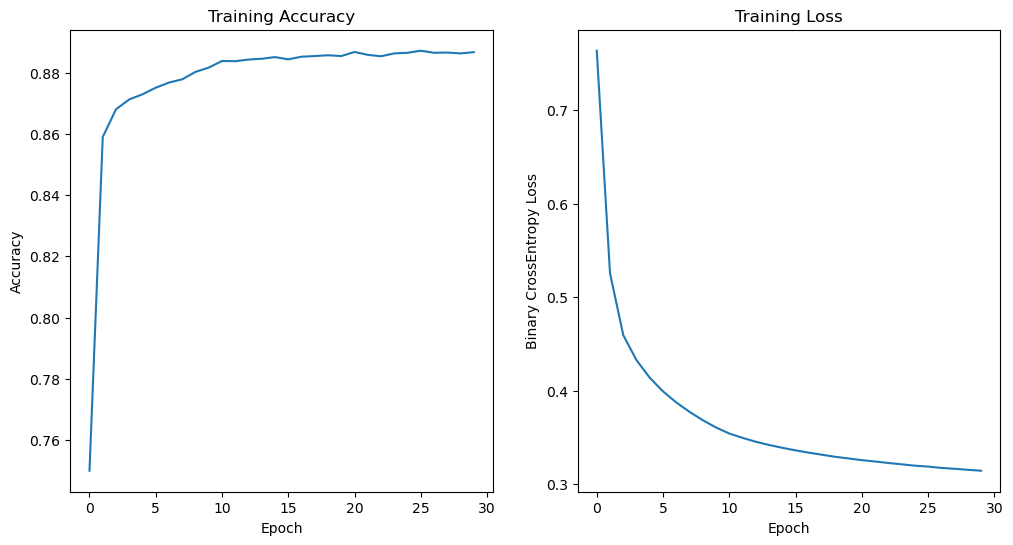

In [23]:
scoreTrain3 = model3.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain3[0])
print('Accuracy of Training Set: ', scoreTrain3[1], '\n')

scoreValid3 = model3.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid3[0])
print('Accuracy of Validation Set: ', scoreValid3[1], '\n')

accuracyCurve3 = np.array(history3.history['accuracy'])
lossCurve3 = np.array(history3.history['loss'])
plotCurve(accuracyCurve3, lossCurve3)

#### 4th Try: 2 Layers, 128 Nodes, 16 Nodes

##### Build The Model:

In [24]:
model4 = Sequential()
model4.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model4.add(Dense(units = 16, activation='tanh')) # 2nd Hidden Layer
model4.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 16)                2064      
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2,755
Trainable params: 2,755
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [25]:
opt4 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])

history4 = model4.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 1s 917us/step - loss: 0.7678 - accuracy: 0.7166
Epoch 2/30
932/932 [==============================] - 1s 971us/step - loss: 0.6346 - accuracy: 0.8280
Epoch 3/30
932/932 [==============================] - 1s 1000us/step - loss: 0.5762 - accuracy: 0.8588
Epoch 4/30
932/932 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.8684
Epoch 5/30
932/932 [==============================] - 1s 981us/step - loss: 0.5066 - accuracy: 0.8744
Epoch 6/30
932/932 [==============================] - 1s 958us/step - loss: 0.4829 - accuracy: 0.8763
Epoch 7/30
932/932 [==============================] - 1s 934us/step - loss: 0.4632 - accuracy: 0.8784
Epoch 8/30
932/932 [==============================] - 1s 868us/step - loss: 0.4463 - accuracy: 0.8801
Epoch 9/30
932/932 [==============================] - 1s 964us/step - loss: 0.4320 - accuracy: 0.8797
Epoch 10/30
932/932 [==============================] - 1s 875us/step - loss: 0.4197

##### Evaluate The Model:

466/466 [==============================] - 0s 765us/step - loss: 0.3325 - accuracy: 0.8868

Total Loss From Training Set:  0.3325254023075104
Accuracy of Training Set:  0.8867709040641785 

117/117 [==============================] - 0s 741us/step - loss: 0.3079 - accuracy: 0.8945

Total Loss From Validation Set:  0.3079189360141754
Accuracy of Validation Set:  0.8944683074951172 



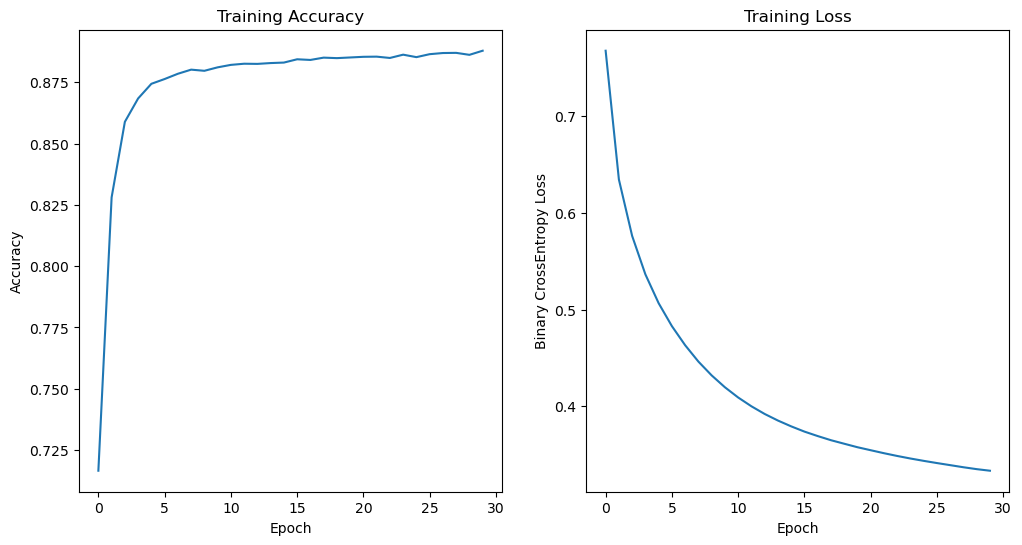

In [26]:
scoreTrain4 = model4.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain4[0])
print('Accuracy of Training Set: ', scoreTrain4[1], '\n')

scoreValid4 = model4.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid4[0])
print('Accuracy of Validation Set: ', scoreValid4[1], '\n')

accuracyCurve4 = np.array(history4.history['accuracy'])
lossCurve4 = np.array(history4.history['loss'])
plotCurve(accuracyCurve4, lossCurve4)

#### 5th Try: 2 Layers, 128 Nodes, 64 Nodes

##### Build The Model:

In [27]:
model5 = Sequential()
model5.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model4.add(Dense(units = 64, activation='tanh')) # 2nd Hidden Layer
model5.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               640       
                                                                 
 dense_13 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [28]:
opt5 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model5.compile(loss='categorical_crossentropy', optimizer=opt5, metrics=['accuracy'])

history5 = model5.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 1s 799us/step - loss: 0.8538 - accuracy: 0.6674
Epoch 2/30
932/932 [==============================] - 1s 814us/step - loss: 0.5808 - accuracy: 0.8435
Epoch 3/30
932/932 [==============================] - 1s 777us/step - loss: 0.5162 - accuracy: 0.8576
Epoch 4/30
932/932 [==============================] - 1s 765us/step - loss: 0.4765 - accuracy: 0.8646
Epoch 5/30
932/932 [==============================] - 1s 831us/step - loss: 0.4477 - accuracy: 0.8680
Epoch 6/30
932/932 [==============================] - 1s 785us/step - loss: 0.4255 - accuracy: 0.8714
Epoch 7/30
932/932 [==============================] - 1s 790us/step - loss: 0.4087 - accuracy: 0.8735
Epoch 8/30
932/932 [==============================] - 1s 887us/step - loss: 0.3957 - accuracy: 0.8764
Epoch 9/30
932/932 [==============================] - 1s 850us/step - loss: 0.3857 - accuracy: 0.8766
Epoch 10/30
932/932 [==============================] - 1s 828us/step - loss: 0.377

##### Evaluate The Model:

466/466 [==============================] - 0s 732us/step - loss: 0.3204 - accuracy: 0.8861

Total Loss From Training Set:  0.3204362690448761
Accuracy of Training Set:  0.8860997557640076 

117/117 [==============================] - 0s 808us/step - loss: 0.2936 - accuracy: 0.8977

Total Loss From Validation Set:  0.29358237981796265
Accuracy of Validation Set:  0.8976906538009644 



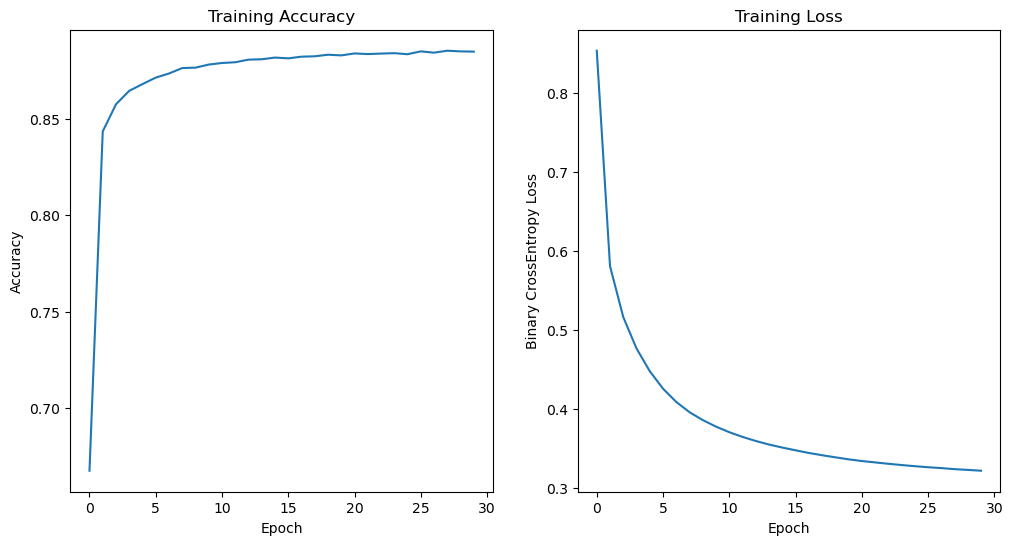

In [29]:
scoreTrain5 = model5.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain5[0])
print('Accuracy of Training Set: ', scoreTrain5[1], '\n')

scoreValid5 = model5.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid5[0])
print('Accuracy of Validation Set: ', scoreValid5[1], '\n')

accuracyCurve5 = np.array(history5.history['accuracy'])
lossCurve5 = np.array(history5.history['loss'])
plotCurve(accuracyCurve5, lossCurve5)

#### Training & Validation Set Results: 
 <div align="center">

| Model # | Details | Training<br>Loss | Training<br>Accuracy | Validation<br>Loss | Validation<br>Accuracy |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $ 1 $ | 1 Layer<br>16 Nodes | $0.4222$ | $0.8709$ | $0.4253$ | $0.8684$ |
| $ 2 $ | 1 Layer<br>64 Nodes | $0.3804$ | $0.8805$ | $0.3876$ | $0.8759$ |
| $ 3 $ | 1 Layer<br>128 Nodes | $0.3127$ | $0.8887$ | $0.3213$ | $0.8869$ |
| $ 4 $ | 2 Layers<br>128 Nodes<br>16 nodes | $0.3389$ | $0.8897$ | $0.3434$ | $0.8861$ |
| $ 5 $ | 2 Layers<br>128 Nodes<br>64 nodes | $0.3176$ | $0.8884$ | $0.3212$ | $0.8886$ |

</div>

f) What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.

#### Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

#### 6th Try, Selected Model 3: 2 Layers, 128 Nodes, 64 Nodes

##### Evaluate The Model:

In [32]:
scoreTestT = model3.evaluate(feature_test_012, y_test_012_cat)
print('\nTotal Loss From Testing Set: ', scoreTestT[0])
print('Accuracy of Testing Set: ', scoreTestT[1], '\n')

99/99 [==============================] - 0s 778us/step - loss: 0.3261 - accuracy: 0.8783

Total Loss From Testing Set:  0.32614704966545105
Accuracy of Testing Set:  0.8782967925071716 



#### Testing Set Results: 
 <div align="center">

| Model # | Details | Testing<br>Loss | Testing<br>Accuracy |
| :-: | :-: | :-: | :-: |
| $ 3 $ | 1 Layer<br>128 Nodes | $0.3261$ | $0.8783$ |

</div>

## Problem 3) Application of Keras to build, compile, and train a neural network to classify songs from Spotify dataset.

#### Import Training & Testing Data:

 - Data Is Already Normalized To Range $ [0, 1] $

In [7]:
spotify_data = pd.read_csv('../assets/HW5/spotify_preprocessed.csv', header=0, index_col=None) # 1st col is not an index

print(f'Spotify Data:\n\nShape: {spotify_data.shape}')
display(spotify_data.head(10))

Spotify Data:

Shape: (6398, 16)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.000000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
1,0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.818090,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
2,0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.000000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
3,0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.000000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
4,0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.000000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0
5,0.456900,0.873842,0.000000,0.935578,1.0,0.067274,0.011145,0.000000,0.406402,0.755123,0.732571,0.108233,0.8,0.150937,0.116279,1.0
6,0.512407,0.935920,0.000000,0.923558,1.0,0.113016,0.013956,0.000000,0.156739,0.492828,0.586937,0.136498,0.8,0.098731,0.139535,0.0
7,0.733348,0.522403,0.181818,0.830753,1.0,0.100161,0.030020,0.000000,0.094582,0.378074,0.339017,0.100058,0.8,0.282472,0.093023,1.0
8,0.112973,0.985982,0.636364,0.941147,1.0,0.158007,0.001837,0.014271,0.975137,0.142418,0.788751,0.130803,0.8,0.146540,0.104651,0.0
9,0.353505,0.773717,0.727273,0.880962,1.0,0.158007,0.098394,0.000000,0.199213,0.377049,0.228777,0.131585,0.8,0.109322,0.081395,1.0


#### Use Target Feature For Classe Labels:

In [11]:
train_labels = np.loadtxt('../assets/HW5/spotify_preprocessed.csv', delimiter=',', skiprows=1, usecols=15)
print(train_labels.shape)
print(f'Training Labels for Training Data: {train_labels}', '\n')

(6398,)
Training Labels for Training Data: [1. 0. 1. ... 1. 0. 0.] 

